In [407]:
# https://www.cnblogs.com/rango-lhl/p/9686195.html

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [408]:

# set pandas
pd.set_option('display.width', 1000)

# use pandas to manage data
train_df = pd.read_csv('D:\STUDY\kaggle\csv/train.csv')
test_df = pd.read_csv('D:\STUDY\kaggle\csv/test.csv')
combine = [train_df, test_df]



In [409]:
train_df.columns.values

array([&#39;PassengerId&#39;, &#39;Survived&#39;, &#39;Pclass&#39;, &#39;Name&#39;, &#39;Sex&#39;, &#39;Age&#39;, &#39;SibSp&#39;,
       &#39;Parch&#39;, &#39;Ticket&#39;, &#39;Fare&#39;, &#39;Cabin&#39;, &#39;Embarked&#39;], dtype=object)

In [410]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [411]:
# 通过使用 percentiles=[.61, .62] 来查看数据集可以了解到生存率为 38%
train_df.describe(percentiles=[.61, .62])


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [412]:
# 通过使用 percentiles=[.76, .77] 来查看Parch的分布
train_df.describe(percentiles=[.76, .77])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
76%,677.400000,1.000000,3.000000,39.000000,1.000000,0.000000,31.387500
77%,686.300000,1.000000,3.000000,39.000000,1.000000,1.000000,33.656240
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [413]:
# 通过使用 percentile=[.68, .69] 来查看SibSp的分布
train_df.describe(percentiles=[.68, .69])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
68%,606.200000,1.000000,3.000000,35.000000,0.000000,0.000000,26.307500
69%,615.100000,1.000000,3.000000,35.000000,1.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [414]:
#通过使用 percentile=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99] 来查看Age和Fare的分布
train_df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [415]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Flynn, Mr. John Irwin (""Irving"")",male,1601,B96 B98,S
freq,1,577,7,4,644


In [416]:
#  Pclass：我们观察到Pclass=1与Survived的相关性较大（>0.5），所以可以考虑将此特征放入到之后的模型里

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [417]:
#  Sex：我们可以确认Sex=female有着高达74%的生存率

train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [418]:
# SibSp 和 Parch：这些特征下有些值与survived有相关性，但是有些又毫无相关性。所以我们可能需要基于这些单独的特征或一系列特征创建一个新特征，以做进一步分析

train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [419]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


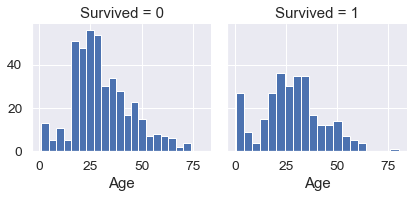

In [420]:
# 数值型特征与Survived之间的联系

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

# 1. 영아 (4세이하) 생존율이 높음
# 2. 노인 Age = 80 전부 생존
# 3. 15 ~ 25세 승객은 돌아오지 못함
# 4. 승객 대부분이 15 ~ 35세 

# 결론
# Age는 우리가 고려해야할 사항, Age로 보간법 시행, 연령층을 구분해야함.


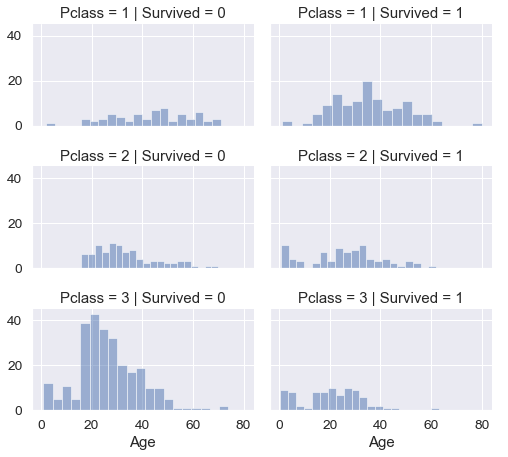

&#39;\n1. Pclass=3 有着最多的乘客，但是他们大多数却没有存活。这也验证了我们之前在“分类”里的假设 \n2. 在Pclass=2和Pclass=3中，大多数婴儿活了下来，进一步验证了我们之前在“分类”里的假设 \n3. 大多数Pclass=1的乘客存活，验证我们之前在“分类”里的假设\n4. 不同Pclass中Age的分布不同\n\n결론\n\nPclass도 훈련에 첨가\n&#39;

In [421]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

'''
1. Pclass=3 有着最多的乘客，但是他们大多数却没有存活。这也验证了我们之前在“分类”里的假设 
2. 在Pclass=2和Pclass=3中，大多数婴儿活了下来，进一步验证了我们之前在“分类”里的假设 
3. 大多数Pclass=1的乘客存活，验证我们之前在“分类”里的假设
4. 不同Pclass中Age的分布不同

결론

Pclass도 훈련에 첨가
'''

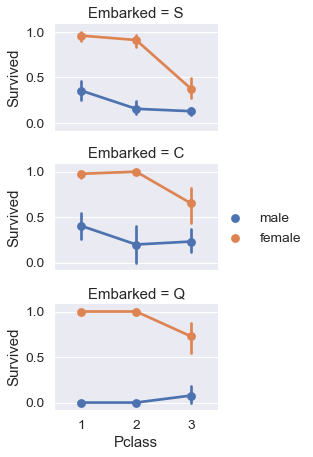

&#39;\n1. 女性乘客相对于男性乘客有着更高的存活率\n2. Embarked和Survived之间可能并没有直接的联系。 \n3. 对于Pclass=3以及男性乘客来说，Embarked的港口不同会导致存活率的不同\n\n결론\n1. 성별 훈련에 추가\n2. Embarked에 null값 채우고 추가\n&#39;

In [422]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',order=[1,2,3],hue_order=train_df.Sex.unique(),palette='deep')
grid.add_legend()
plt.show()

'''
1. 女性乘客相对于男性乘客有着更高的存活率
2. Embarked和Survived之间可能并没有直接的联系。 
3. 对于Pclass=3以及男性乘客来说，Embarked的港口不同会导致存活率的不同

결론
1. 성별 훈련에 추가
2. Embarked에 null값 채우고 추가
'''

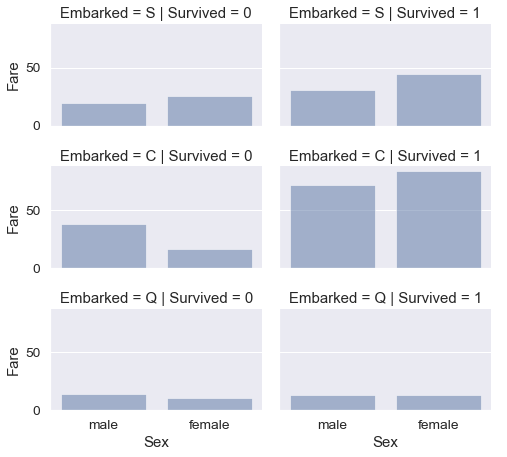

&#39;\n1. 높은 가격의 표를 구입한 승객의 생환률이 높음 , 가설 입증\n2. Embarked와 생존률의 연관성 가설 입증\n3. Fare 특징 첨가\n&#39;

In [423]:
'''
我们可以考虑查看Embarked（离散非数值型），Sex（离散非数值型），Fare（连续数值型）与Survived（离散数值型）之间的关系
'''
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', order=train_df.Sex.unique(),alpha=.5, ci=None)
grid.add_legend()
plt.show()

'''
1. 높은 가격의 표를 구입한 승객의 생환률이 높음 , 가설 입증
2. Embarked와 생존률의 연관성 가설 입증
3. Fare 특징 첨가
'''

In [424]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


In [425]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

After (891, 10) (418, 9) (891, 10) (418, 9)


In [426]:
for dataset in combine:
        dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [427]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt',
                                                 'Col', 'Don', 'Dr', 'Major',
                                                 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [428]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [429]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [430]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [431]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


In [432]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


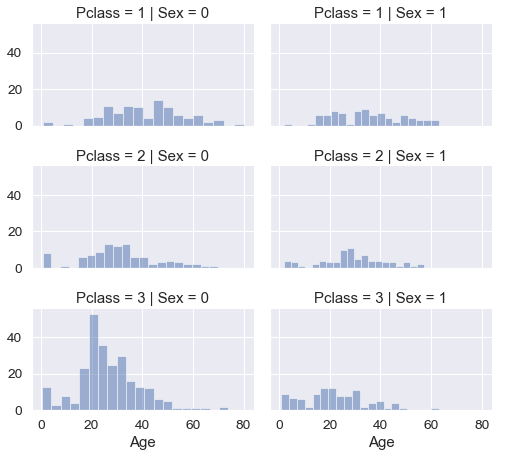

In [433]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

In [434]:
guess_ages = np.zeros((2, 3))

In [435]:
# 然后我们可以对Sex（0或1）和Pclass（1，2，3）进行迭代，并计算出在6中组合下所得到的猜测（Age）值
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i, j] = int(age_guess / 0.5 + 0.5) * 0.5

    for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),
                             'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

 
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [436]:
#  现在我们对Age分段，并查看每段与Survived之间的相关性：
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [437]:
#然后我们根据上面的分段，使用有序的数值来替换Age里的值：

for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [438]:
# AgeBand 삭제
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [439]:
'''通过已有的特征组合出新特征

现在我们可以通过组合Parch和SibSp特征，创建一个新的FamilySize特征。这个步骤可以让我们从数据集里丢弃Parch与SibSp特征。'''

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [440]:
# 接着我们可以创建另一个名为IsAlone的特征
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [441]:
# 基于上面的数据表现，我们现在可以丢弃Parch、SibSp以及FamilySize的特征，保留IsAlone的特征：

train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [442]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [443]:
'''
补全一个离散型的特征

Embarked特征主要有三个值，分别为S，Q，C，对应了三个登船港口。在训练集里，这个有2个缺失值，我们会使用频率最高的值来填充这个缺失值。
'''
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port


&#39;S&#39;

In [444]:

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [445]:
'''
将离散型特征转换为数值型

我们现在可以将离散型的Embarked特征转换为数值型特征
'''
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

train_df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [446]:
'''补全数值型特征

现在我们可以开始为测试集里的Fare特征补全数据。在补全时，我们可以使用最频繁出现的数据用于补全缺失值。

（我们也可以将Fare的数值做四舍五入，将它精确到2位）'''
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [447]:
# 接下来我们将Fare分段：
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [448]:
# 根据分段后的特征FareBand，将Fare转换为有序的数值型特征：

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


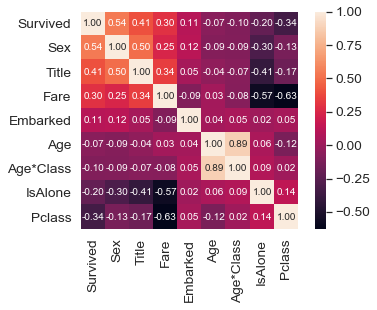

In [449]:
# Survived与其他特征之间的相关性
corrmat = train_df.corr()

k = 10
cols = corrmat.nlargest(k,'Survived')['Survived'].index  #取出与Survived相关性最大的十项
cm = np.corrcoef(train_df[cols].values.T)  #相关系数 
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm,cbar = True,annot = True,square = True ,fmt = '.2f',annot_kws = {'size': 10},yticklabels = cols.values,xticklabels = cols.values)
plt.show()

In [450]:
'''
1. Logistic Regression
2. kNN 
3. SVM
4. Naïve Bayes classifier
5. Decision Tree
6. Random Forrest
7. Perceptron
8. Artificial neural network
9. RVM or Relevance Vector Machine
'''
X_train = train_df.drop('Survived', axis=1)
# X_train = train_df.drop(['Survived','Title'], axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
print(X_train.head())


   Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0       3    0    1     0         0      1        0          3
1       1    1    2     3         1      3        0          2
2       3    1    1     1         0      2        1          3
3       1    1    2     3         0      3        0          2
4       3    0    2     1         0      1        1          6


In [451]:
# 1. Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

#  80.36

80.36

In [452]:

'''
1. Sex是有最高正系数的特征。这个表面当Sex 的值增加时（从male：0到female：1），Survived=1的概率增加最多
2. 相反的，当Pclass增加时，Survived=1的概率减少最多
3. 从结果来看，我们创建的新特征Age*Class非常有用，因为它与Survived的负相关性是第二高的
4. Title是第二高的正系数特征
'''
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


In [453]:
# SVM

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

In [454]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In [455]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [456]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [457]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.12

In [458]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

71.04

In [459]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree


86.76

In [471]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [468]:

et_param = ExtraTreesClassifier()
et_param.fit(X_train, Y_train)
Y_pred = et_param.predict(X_test)
acc_et_param = round(et_param.score(X_train, Y_train) * 100, 2)
acc_et_param


86.76

In [466]:

# from xgboost import XGBClassifier
xg_boost = XGBClassifier()
xg_boost.fit(X_train, Y_train)
Y_pred = xg_boost.predict(X_test)
acc_xg_boost = round(xg_boost.score(X_train, Y_train) * 100, 2)
acc_xg_boost

86.53

In [467]:
gb_boost = GradientBoostingClassifier()
gb_boost.fit(X_train, Y_train)
Y_pred = gb_boost.predict(X_test)
acc_gb_boost = round(gb_boost.score(X_train, Y_train) * 100, 2)
acc_gb_boost

84.74

In [472]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Linear SVC','Decision Tree','GradientBoostingClassifier', 'XGBClassifier', 'ExtraTreesClassifier' ],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest,acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree, acc_gb_boost, acc_xg_boost, acc_et_param]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
11,ExtraTreesClassifier,86.76
10,XGBClassifier,86.53
1,KNN,84.74
9,GradientBoostingClassifier,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23


In [473]:
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": y_pred})
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [475]:
submission.to_csv('D:\STUDY\kaggle\csv/submission_my1.csv', index=False)
print("끝")

끝
